# Indicators of Heavy Traffic on I-94

In this project, we are going to analyze a [dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#) about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

Determining some indicators of heavy traffic on I-94 is the goal of our analysis. These indicators can be the type of weather, the time of day, the time of the week, etc.

## The I-94 Traffic Dataset

In [2]:
import pandas as pd

i_94 = pd.read_csv(r'D:\Metro_Interstate_Traffic_Volume.csv')

Let's investigate our dataset using `DataFrame.info()`

In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


The dataset contains 48,203 rows and 9 columns, and fortunatelly there is no null values. Each row describes the traffic and weather data for a particular hour, we have data from 02.10.2012 9:00am to 30.09.2018 11:00pm.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Analyzing Traffic Volume

At the beginning of our analysis, we will have a look at the distribution of the `traffic_volume` column.

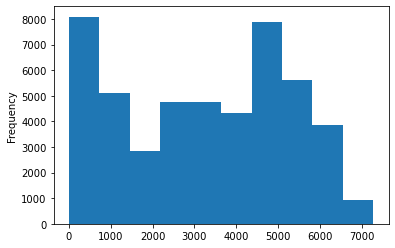

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

i_94['traffic_volume'].plot.hist()
plt.show()

In [11]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

## Traffic Volume: Day vs. Night

We're going to start by dividing the data set into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

This is a good starting point, although it is not a perfect criterion for distinguishing daytime from nighttime.

In [24]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour < 7) | (i_94['date_time'].dt.hour >= 19)]
print(night.shape)

(23877, 9)
(24327, 9)


There may be some missing data in the dataset that explains the difference in the number of rows. Nevertheless, it will not affect our analysis.

## Traffic Volume: Day vs. Night (II)

Now we have a comparison of the traffic volume during the day and at night.

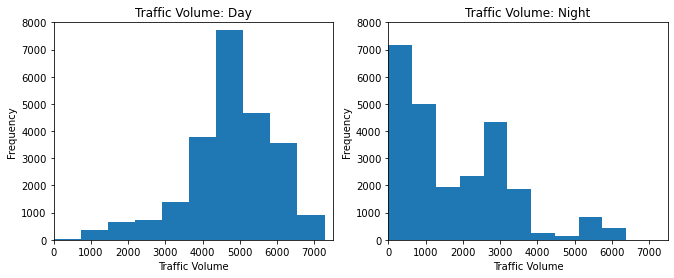

In [41]:
plt.figure(figsize =(11, 4))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')


plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [42]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [43]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

There is a left skew in the histogram showing the distribution of traffic during the day. That is, most of the traffic volume values are high-there are 4,252 or more cars passing the station every hour 75% of the time (because 25% of the values are less than 4,252).

The histogram showing the night data is skewed to the right. In 75% of the cases, the number of vehicles passing the station per hour is below 2,819.

Traffic at night is generally light, although there are still readings of over 5,000 cars per hour. We're interested in finding indicators of heavy traffic, so we'll focus only on day data in the future.

## Time Indicators

A potential indicator for heavy traffic is time. In a certain month, on a certain day, or at a certain time of day, there may be more people on the road.

Let's look at some line graphs. They show how the volume of traffic changes according to the following:

* Month
* Day of the week
* Time of Day

In [48]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

<AxesSubplot:xlabel='month'>

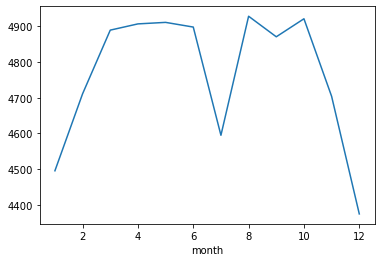

In [49]:
by_month['traffic_volume'].plot.line()

Traffic seems to be lighter in the cold months (November to February) and heavier in the warm months (March to October), with one interesting exception: July. What's special in July? It could be due to the high temperatures, but before making such assumptions, it is necessary to examine the month of July separately. 

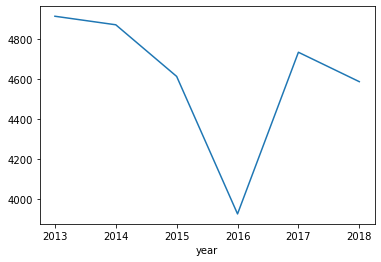

In [52]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()

plt.show()

The assumption about the weather was wrong. As a rule, the traffic volume in July is quite high, similar to the other warm months. The year 2016, which saw a significant decrease in traffic, is the only exception. One of the possible reasons for this is the [road construction](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) - this article from the year 2016 supports this hypothesis.

As a preliminary conclusion, we can say that warm months generally have more traffic compared to cold months. You can expect a traffic volume of almost 5,000 cars per hour of the day in a warm month.

## Time Indicators (II)

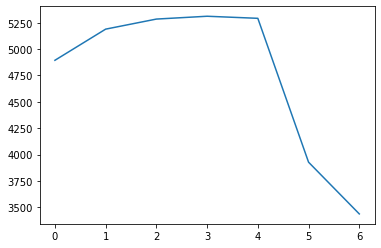

In [55]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()

plt.plot(by_dayofweek['traffic_volume'])
plt.show()

On business days (Monday - Friday) the traffic is significantly higher. With the exception of Monday, we only see values of more than 5,000 on business days. On weekends, the traffic is lighter, with values of less than 4,000 cars.

## Time Indicators (III)

Now we have a look at what we have in terms of time of day values. However, weekends have a negative effect on the averages, so we'll just have a look at the averages separately.

In [57]:
day['hour'] = day['date_time'].dt.hour

bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday

by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


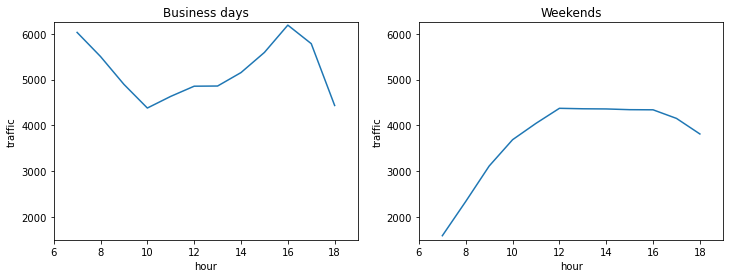

In [76]:
plt.figure(figsize =(12, 4))

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Business days')
plt.xlim(6,19)
plt.ylim(1500, 6250)
plt.xlabel('hour')
plt.ylabel('traffic')

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekends')
plt.xlim(6,19)
plt.ylim(1500, 6250)
plt.xlabel('hour')
plt.ylabel('traffic')

plt.show()

Traffic is generally heavier on weekdays than on weekends at every hour of the day. Somewhat predictably, the peak hours are around 7am and 4pm, when most people are traveling from home to work and back. During rush hours, we see volumes of over 6,000 cars.

Summarizing, we found some temporal indicators of heavy traffic:

* Traffic tends to be heavier in the warm months (March-October) compared to the cold months (November-February).
* On workdays compared to weekends, traffic is usually heavier.
* Peak hours are around 7am and 4pm on business days.

##  Weather Indicators

The weather may also indicate high traffic. Some useful columns about the weather: `Temp`, `Rain_1h`, `Snow_1h`, `Clouds_all`, `Weather_main`, `Weather_Description`.

Some of these columns are numeric. Let's start by looking at their correlation values with `traffic_volume`.

In [79]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

With a value of only +0.13, temperature shows the strongest correlation. There is no strong correlation with traffic_value for the other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`).

To visualize the correlation between temp and `traffic_value`, let's create a scatterplot.

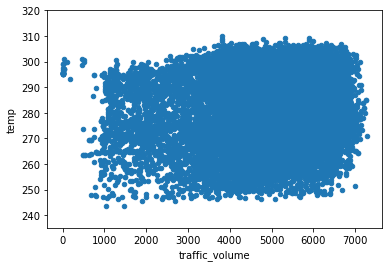

In [85]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(235, 320)

plt.show()

Our conclusion is that the temperature is not a good indicator of whether there is a lot of traffic or not.

Now, let's examine the other weather-related columns: `weather_main` and `weather_description`.

## Weather Types

First, we'll group the data by `weather_main` and look at the `traffic_volume` averages.

In [86]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

There doesn't seem to be any weather type where the traffic volume exceeds 5,000 cars. So the search for a heavy traffic indicator is a bit difficult. Let's also group by weather_description, which has a more detailed weather categorization.

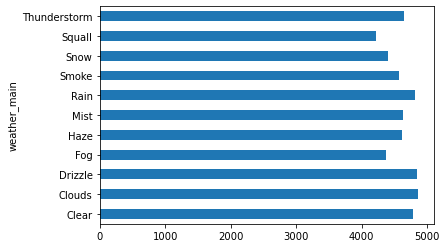

In [89]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

<AxesSubplot:ylabel='weather_description'>

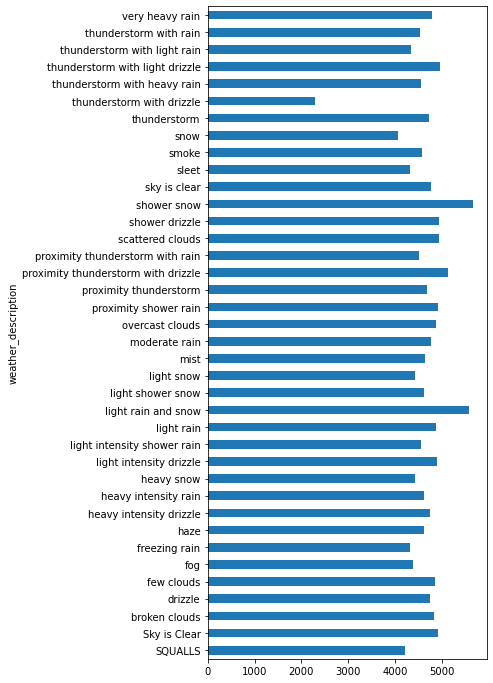

In [110]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,12))

There seem to be three types of weather where traffic is over 5,000:

* Shower snow
* Light rain and snow
* Near thunderstorm with drizzle

We don't know why these weather conditions have the highest average traffic-they're bad weather, but they aren't bad. Maybe instead of biking or walking, more people get their cars out of the garage in bad weather.

## Conclusion

This project looked at some indicators of heavy traffic on I-94. Two types of indicators were found:

* Time indicators
    * In warm months (March-October) compared to cold months (November-February) traffic is usually heavier.
    * On workdays compared to weekends traffic is usually heavier.
    * Peak hours on weekdays are around 7 and 16.
* Weather Indicators
    * Shower Snow
    * Light rain and snow
    * Near thunderstorm with drizzle